In [4]:
# main_notebook.ipynb
import sys
import os
import yaml
import pandas as pd

# Add the analysis script path
sys.path.append(os.path.join(os.getcwd(), 'Task3', 'scripts'))

# Add the 'scripts' directory to the Python path
sys.path.append(os.path.abspath('../scripts'))

# Add the directory containing the modules to the system path
sys.path.append(os.path.join(os.getcwd(), 'scripts', ))


In [5]:
file_path = "C:\\Users\\user\\Documents\\My Projects\\New folder\\raw_analyst_ratings.csv"
news_df = pd.read_csv(file_path)
stock_df = pd.read_csv(r'C:\Users\user\Desktop\KIFIYA Projects\Nova-Financial-Solutions-Week-01\dataset\AAPL_historical_data.csv')


In [6]:
import pandas as pd

# Step 1: Load the data from both CSV files
ticker_news_data = pd.read_csv(r'C:\\Users\\user\\Documents\\My Projects\\New folder\\raw_analyst_ratings.csv')  # Adjust the path if necessary
stock_data = pd.read_csv(r'C:\Users\user\Desktop\KIFIYA Projects\Nova-Financial-Solutions-Week-01\dataset\AAPL_historical_data.csv')  # Adjust the path if necessary


In [7]:
# Step 2: Convert date columns to datetime
ticker_news_data['date'] = pd.to_datetime(ticker_news_data['date'], errors='coerce')  # Convert news date column to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')  # Convert stock date column to datetime

# Step 3: Check the unique dates in both datasets
print(f"Unique dates in ticker_news_data:\n{ticker_news_data['date'].unique()}\n")
print(f"Unique dates in stock_data:\n{stock_data['Date'].unique()}\n")

Unique dates in ticker_news_data:
<DatetimeArray>
['2020-06-05 10:30:54-04:00', '2020-06-03 10:45:20-04:00',
 '2020-05-26 04:30:07-04:00', '2020-05-22 12:45:06-04:00',
 '2020-05-22 11:38:59-04:00', '2020-05-22 11:23:25-04:00',
 '2020-05-22 09:36:20-04:00', '2020-05-22 09:07:04-04:00',
 '2020-05-22 08:37:59-04:00', '2020-05-22 08:06:17-04:00',
 ...
 '2017-06-09 15:51:34-04:00', '2016-08-08 17:26:28-04:00',
 '2016-07-26 17:17:26-04:00', '2016-07-26 16:18:23-04:00',
 '2016-07-13 16:51:39-04:00', '2016-06-17 15:55:40-04:00',
 '2016-06-17 11:05:40-04:00', '2016-06-17 07:33:17-04:00',
 '2016-06-16 14:30:47-04:00', '2016-06-16 12:45:07-04:00']
Length: 27315, dtype: datetime64[ns, UTC-04:00]

Unique dates in stock_data:
<DatetimeArray>
['1980-12-12 00:00:00', '1980-12-15 00:00:00', '1980-12-16 00:00:00',
 '1980-12-17 00:00:00', '1980-12-18 00:00:00', '1980-12-19 00:00:00',
 '1980-12-22 00:00:00', '1980-12-23 00:00:00', '1980-12-24 00:00:00',
 '1980-12-26 00:00:00',
 ...
 '2024-07-17 00:00:00',

In [8]:
ticker_news_data['date'] = pd.to_datetime(ticker_news_data['date'])
ticker_news_data['date'] = ticker_news_data['date'].dt.date
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date

In [33]:
merged_data = pd.merge(ticker_news_data, stock_data, left_on='date', right_on='Date', how='inner')
merged_data = merged_data.drop(columns=['Unnamed: 0'])
merged_data = merged_data.drop(columns=['Date'])
print(merged_data.head(10))
print(merged_data.columns)

                                            headline  \
0            Stocks That Hit 52-Week Highs On Friday   
1         Stocks That Hit 52-Week Highs On Wednesday   
2                      71 Biggest Movers From Friday   
3       46 Stocks Moving In Friday's Mid-Day Session   
4  B of A Securities Maintains Neutral on Agilent...   
5  CFRA Maintains Hold on Agilent Technologies, L...   
6  UBS Maintains Neutral on Agilent Technologies,...   
7  Agilent Technologies shares are trading higher...   
8  Wells Fargo Maintains Overweight on Agilent Te...   
9         10 Biggest Price Target Changes For Friday   

                                                 url                publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...        Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...        Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...               Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...       

In [34]:
# Filter the rows where the 'stock' column is 'AAPL'
aapl_data_filtered = merged_data[merged_data['stock'] == 'AAPL']

# Display the first few rows to confirm the filtering
print(aapl_data_filtered.head())


                                              headline  \
102  Tech Stocks And FAANGS Strong Again To Start D...   
103      10 Biggest Price Target Changes For Wednesday   
104  Benzinga Pro's Top 5 Stocks To Watch For Wed.,...   
105  Deutsche Bank Maintains Buy on Apple, Raises P...   
106  Apple To Let Users Trade In Their Mac Computer...   

                                                   url          publisher  \
102  https://www.benzinga.com/government/20/06/1622...         JJ Kinahan   
103  https://www.benzinga.com/analyst-ratings/price...         Lisa Levin   
104  https://www.benzinga.com/short-sellers/20/06/1...  Benzinga Newsdesk   
105  https://www.benzinga.com/news/20/06/16219873/d...  Benzinga Newsdesk   
106  https://www.benzinga.com/news/20/06/16218697/a...      Neer Varshney   

           date stock       Open       High        Low      Close  Adj Close  \
102  2020-06-10  AAPL  72.976997  73.712952  72.813499  73.292503  73.209198   
103  2020-06-10  AAPL  72.97

========================================
Section Title: AAPL_Sentimental_Analysis
========================================
Author: Eyor Getachew
Date: 2024-12-16
========================================

In [35]:
from textblob import TextBlob

# Define a function to calculate sentiment polarity
def get_sentiment_score(text):
    # Get the polarity score (-1 to 1)
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment analysis to the 'headline' column
aapl_data_filtered['sentiment_score'] = aapl_data_filtered['headline'].apply(get_sentiment_score)

# Check the sentiment scores
print(f"Sentiment Analysis Results:\n{aapl_data_filtered[['headline', 'sentiment_score']].head()}")


Sentiment Analysis Results:
                                              headline  sentiment_score
102  Tech Stocks And FAANGS Strong Again To Start D...         0.433333
103      10 Biggest Price Target Changes For Wednesday         0.000000
104  Benzinga Pro's Top 5 Stocks To Watch For Wed.,...         0.500000
105  Deutsche Bank Maintains Buy on Apple, Raises P...         0.000000
106  Apple To Let Users Trade In Their Mac Computer...         0.000000


C:\Users\user\AppData\Local\Temp\ipykernel_16936\3021020583.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_data_filtered['sentiment_score'] = aapl_data_filtered['headline'].apply(get_sentiment_score)


=======================================
Section Title: AAPL_Daily_Stock_Returns
=======================================
Author: Eyor Getachew
Date: 2024-12-16
=======================================

In [36]:
# Calculate daily stock returns (percentage change in closing price)
aapl_data_filtered['daily_return'] = aapl_data_filtered['Close'].pct_change() * 100  # Percentage change

# Check the daily returns
print(f"Daily Stock Returns:\n{aapl_data_filtered[['date', 'stock', 'Close', 'daily_return']].head()}")


Daily Stock Returns:
           date stock      Close  daily_return
102  2020-06-10  AAPL  73.292503           NaN
103  2020-06-10  AAPL  73.292503           0.0
104  2020-06-10  AAPL  73.292503           0.0
105  2020-06-10  AAPL  73.292503           0.0
106  2020-06-10  AAPL  73.292503           0.0


C:\Users\user\AppData\Local\Temp\ipykernel_16936\3544133984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_data_filtered['daily_return'] = aapl_data_filtered['Close'].pct_change() * 100  # Percentage change


========================================
Section Title: AAPL_Correlation_Analysis
========================================
Author: Eyor Getachew
Date: 2024-12-16
========================================

In [37]:
# Group by date and compute the average sentiment score for each day
daily_sentiment = aapl_data_filtered.groupby('date')['sentiment_score'].mean().reset_index()

# Merge the daily sentiment with the stock data
merged_analysis = pd.merge(aapl_data_filtered[['date', 'stock', 'daily_return']], daily_sentiment, on='date')

# Calculate the Pearson correlation between sentiment scores and stock returns
correlation = merged_analysis['sentiment_score'].corr(merged_analysis['daily_return'])

# Display the correlation result
print(f"Pearson Correlation between Daily Sentiment and Stock Returns: {correlation}")


Pearson Correlation between Daily Sentiment and Stock Returns: 0.39528470752104755


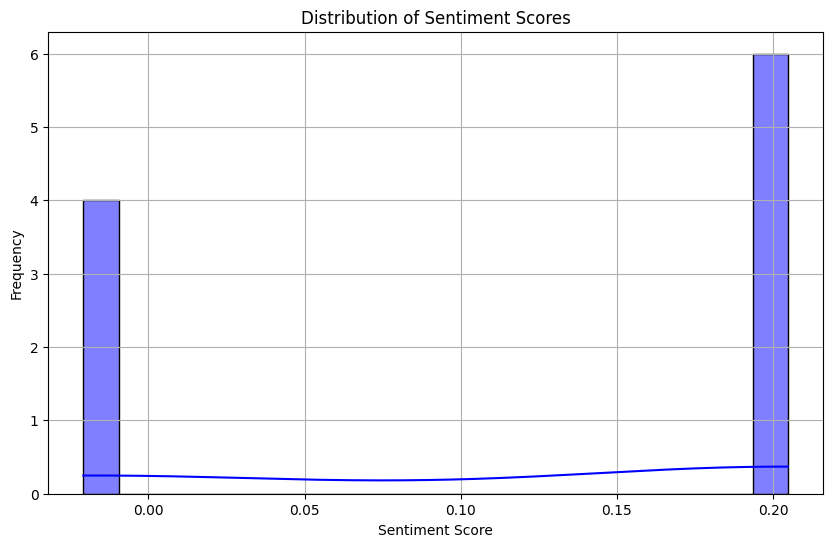

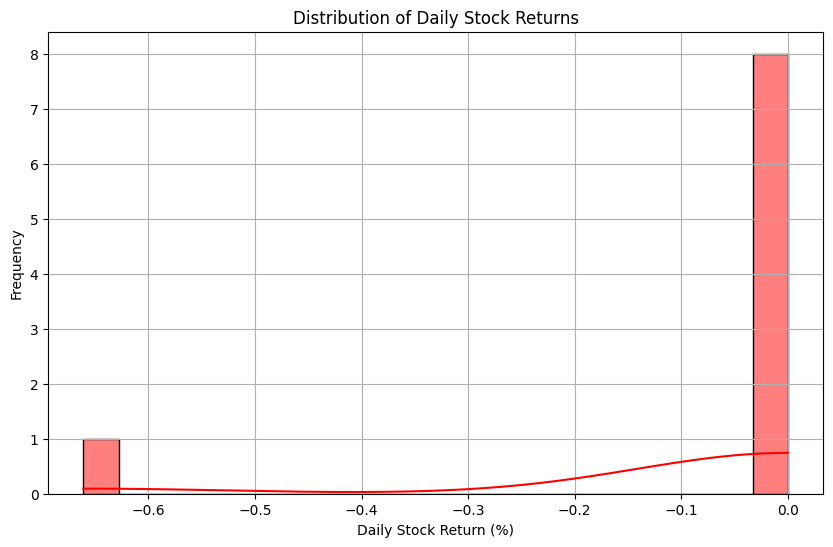

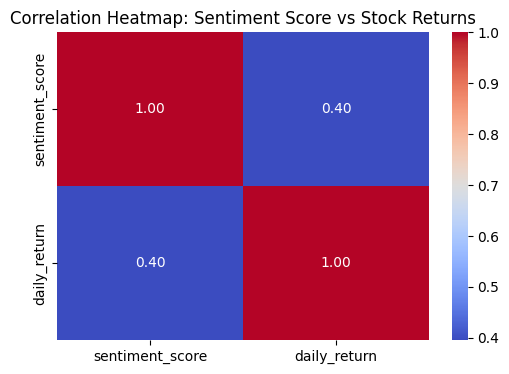

In [48]:
# Plot histogram of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(merged_analysis['sentiment_score'], kde=True, color='blue', bins=20)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histogram of daily stock returns
plt.figure(figsize=(10, 6))
sns.histplot(merged_analysis['daily_return'], kde=True, color='red', bins=20)
plt.title('Distribution of Daily Stock Returns')
plt.xlabel('Daily Stock Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Correlation heatmap
correlation_matrix = merged_analysis[['sentiment_score', 'daily_return']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap: Sentiment Score vs Stock Returns')
plt.show()


========================================
Section Title: AMZN_Analysis
========================================
Author: Eyor Getachew
Date: 2024-12-16
========================================

In [50]:
import pandas as pd

# Step 1: Load the data from both CSV files
ticker_news_dataa = pd.read_csv(r'C:\\Users\\user\\Documents\\My Projects\\New folder\\raw_analyst_ratings.csv')  # Adjust the path if necessary
stock_dataa = pd.read_csv(r'C:\Users\user\Desktop\KIFIYA Projects\Nova-Financial-Solutions-Week-01\dataset\AMZN_historical_data.csv')  # Adjust the path if necessary


In [51]:
# Step 2: Convert date columns to datetime
ticker_news_dataa['date'] = pd.to_datetime(ticker_news_dataa['date'], errors='coerce')  # Convert news date column to datetime
stock_dataa['Date'] = pd.to_datetime(stock_dataa['Date'], errors='coerce')  # Convert stock date column to datetime

# Step 3: Check the unique dates in both datasets
print(f"Unique dates in ticker_news_data:\n{ticker_news_dataa['date'].unique()}\n")
print(f"Unique dates in stock_data:\n{stock_dataa['Date'].unique()}\n")

Unique dates in ticker_news_data:
<DatetimeArray>
['2020-06-05 10:30:54-04:00', '2020-06-03 10:45:20-04:00',
 '2020-05-26 04:30:07-04:00', '2020-05-22 12:45:06-04:00',
 '2020-05-22 11:38:59-04:00', '2020-05-22 11:23:25-04:00',
 '2020-05-22 09:36:20-04:00', '2020-05-22 09:07:04-04:00',
 '2020-05-22 08:37:59-04:00', '2020-05-22 08:06:17-04:00',
 ...
 '2017-06-09 15:51:34-04:00', '2016-08-08 17:26:28-04:00',
 '2016-07-26 17:17:26-04:00', '2016-07-26 16:18:23-04:00',
 '2016-07-13 16:51:39-04:00', '2016-06-17 15:55:40-04:00',
 '2016-06-17 11:05:40-04:00', '2016-06-17 07:33:17-04:00',
 '2016-06-16 14:30:47-04:00', '2016-06-16 12:45:07-04:00']
Length: 27315, dtype: datetime64[ns, UTC-04:00]

Unique dates in stock_data:
<DatetimeArray>
['1997-05-15 00:00:00', '1997-05-16 00:00:00', '1997-05-19 00:00:00',
 '1997-05-20 00:00:00', '1997-05-21 00:00:00', '1997-05-22 00:00:00',
 '1997-05-23 00:00:00', '1997-05-27 00:00:00', '1997-05-28 00:00:00',
 '1997-05-29 00:00:00',
 ...
 '2024-07-17 00:00:00',

In [52]:
ticker_news_dataa['date'] = pd.to_datetime(ticker_news_dataa['date'])
ticker_news_dataa['date'] = ticker_news_dataa['date'].dt.date
stock_dataa['Date'] = pd.to_datetime(stock_dataa['Date']).dt.date

In [53]:
merged_dataa = pd.merge(ticker_news_dataa, stock_dataa, left_on='date', right_on='Date', how='inner')
merged_dataa = merged_dataa.drop(columns=['Unnamed: 0'])
merged_dataa = merged_dataa.drop(columns=['Date'])
print(merged_data.head(10))

                                            headline  \
0            Stocks That Hit 52-Week Highs On Friday   
1         Stocks That Hit 52-Week Highs On Wednesday   
2                      71 Biggest Movers From Friday   
3       46 Stocks Moving In Friday's Mid-Day Session   
4  B of A Securities Maintains Neutral on Agilent...   
5  CFRA Maintains Hold on Agilent Technologies, L...   
6  UBS Maintains Neutral on Agilent Technologies,...   
7  Agilent Technologies shares are trading higher...   
8  Wells Fargo Maintains Overweight on Agilent Te...   
9         10 Biggest Price Target Changes For Friday   

                                                 url                publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...        Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...        Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...               Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...       

In [54]:
# Filter the rows where the 'stock' column is 'AAPL'
amzn_data_filtered = merged_dataa[merged_dataa['stock'] == 'AMZN']

# Display the first few rows to confirm the filtering
print(amzn_data_filtered.head())


                                               headline  \
2618  How Cannabis Company Cannaphyll Is Marketing O...   
2619  Tech Stocks And FAANGS Strong Again To Start D...   
2620  Benzinga Pro's Top 5 Stocks To Watch For Wed.,...   
2621  Hearing Vertical Group Out Positive On Amazon,...   
2622  Big Tech Reaches New Record Heights At The Sto...   

                                                    url          publisher  \
2618  https://www.benzinga.com/markets/cannabis/20/0...        Jaycee Tenn   
2619  https://www.benzinga.com/government/20/06/1622...         JJ Kinahan   
2620  https://www.benzinga.com/short-sellers/20/06/1...  Benzinga Newsdesk   
2621  https://www.benzinga.com/analyst-ratings/analy...  Benzinga Newsdesk   
2622  https://www.benzinga.com/news/20/06/16218615/b...      Neer Varshney   

            date stock    Open        High         Low       Close  \
2618  2020-06-10  AMZN  132.25  136.117493  131.313004  132.372498   
2619  2020-06-10  AMZN  132.25  136.

========================================
Section Title: AMZN_Sentimental_Analysis
========================================
Author: Eyor Getachew
Date: 2024-12-16
========================================

In [55]:
from textblob import TextBlob

# Define a function to calculate sentiment polarity
def get_sentiment_score(text):
    # Get the polarity score (-1 to 1)
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment analysis to the 'headline' column
amzn_data_filtered['sentiment_score'] = amzn_data_filtered['headline'].apply(get_sentiment_score)

# Check the sentiment scores
print(f"Sentiment Analysis Results:\n{amzn_data_filtered[['headline', 'sentiment_score']].head()}")


Sentiment Analysis Results:
                                               headline  sentiment_score
2618  How Cannabis Company Cannaphyll Is Marketing O...         0.000000
2619  Tech Stocks And FAANGS Strong Again To Start D...         0.433333
2620  Benzinga Pro's Top 5 Stocks To Watch For Wed.,...         0.500000
2621  Hearing Vertical Group Out Positive On Amazon,...         0.227273
2622  Big Tech Reaches New Record Heights At The Sto...         0.068182


C:\Users\user\AppData\Local\Temp\ipykernel_16936\226640988.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_data_filtered['sentiment_score'] = amzn_data_filtered['headline'].apply(get_sentiment_score)


========================================
Section Title: AMZN_Daily_Stock_Returns
========================================
Author: Eyor Getachew
Date: 2024-12-16
========================================

In [56]:
# Calculate daily stock returns (percentage change in closing price)
amzn_data_filtered['daily_return'] = amzn_data_filtered['Close'].pct_change() * 100  # Percentage change

# Check the daily returns
print(f"Daily Stock Returns:\n{amzn_data_filtered[['date', 'stock', 'Close', 'daily_return']].head()}")

Daily Stock Returns:
            date stock       Close  daily_return
2618  2020-06-10  AMZN  132.372498           NaN
2619  2020-06-10  AMZN  132.372498           0.0
2620  2020-06-10  AMZN  132.372498           0.0
2621  2020-06-10  AMZN  132.372498           0.0
2622  2020-06-10  AMZN  132.372498           0.0


C:\Users\user\AppData\Local\Temp\ipykernel_16936\137770894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_data_filtered['daily_return'] = amzn_data_filtered['Close'].pct_change() * 100  # Percentage change


========================================
Section Title: AMZN_Correlation_Analysis
========================================
Author: Eyor Getachew
Date: 2024-12-16
========================================

In [57]:
# Group by date and compute the average sentiment score for each day
daily_sentimenta = amzn_data_filtered.groupby('date')['sentiment_score'].mean().reset_index()

# Merge the daily sentiment with the stock data
merged_analysisa = pd.merge(amzn_data_filtered[['date', 'stock', 'daily_return']], daily_sentimenta, on='date')

# Calculate the Pearson correlation between sentiment scores and stock returns
correlation = merged_analysisa['sentiment_score'].corr(merged_analysisa['daily_return'])

# Display the correlation result
print(f"Pearson Correlation between Daily Sentiment and Stock Returns: {correlation}")


Pearson Correlation between Daily Sentiment and Stock Returns: 0.39528470752104744


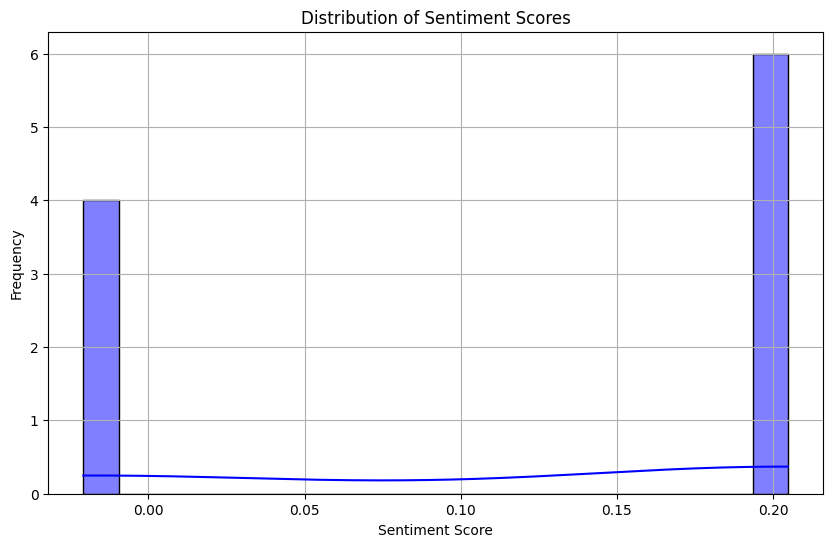

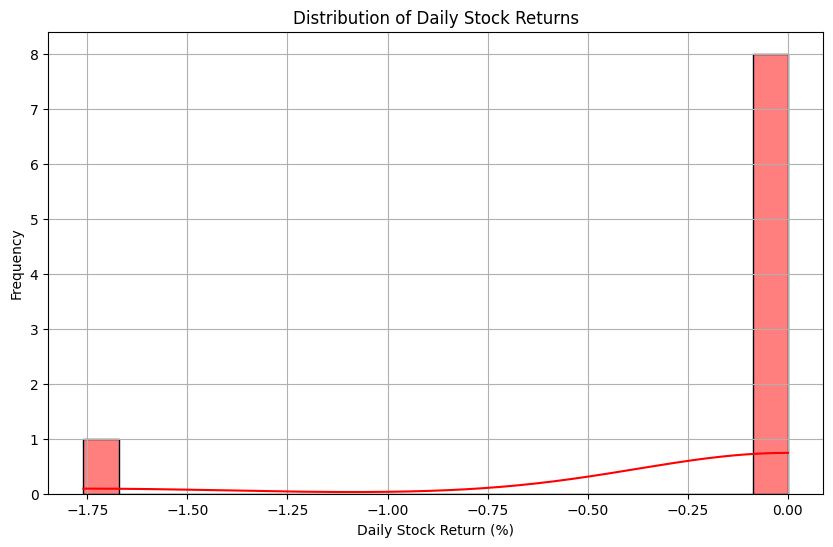

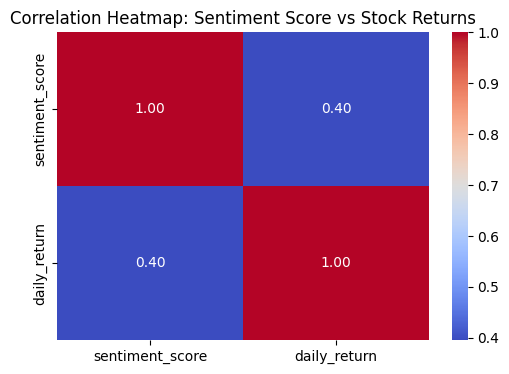

In [58]:
# Plot histogram of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(merged_analysisa['sentiment_score'], kde=True, color='blue', bins=20)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histogram of daily stock returns
plt.figure(figsize=(10, 6))
sns.histplot(merged_analysisa['daily_return'], kde=True, color='red', bins=20)
plt.title('Distribution of Daily Stock Returns')
plt.xlabel('Daily Stock Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Correlation heatmap
correlation_matrix = merged_analysisa[['sentiment_score', 'daily_return']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap: Sentiment Score vs Stock Returns')
plt.show()


========================================
Section Title: GOOG_Analysis
========================================
Author: Eyor Getachew
Date: 2024-12-16
========================================

In [61]:
import pandas as pd

# Step 1: Load the data from both CSV files
ticker_news_datag = pd.read_csv(r'C:\\Users\\user\\Documents\\My Projects\\New folder\\raw_analyst_ratings.csv')  # Adjust the path if necessary
stock_datag = pd.read_csv(r'C:\Users\user\Desktop\KIFIYA Projects\Nova-Financial-Solutions-Week-01\dataset\GOOG_historical_data.csv')

In [62]:
# Step 2: Convert date columns to datetime
ticker_news_datag['date'] = pd.to_datetime(ticker_news_datag['date'], errors='coerce')  # Convert news date column to datetime
stock_datag['Date'] = pd.to_datetime(stock_datag['Date'], errors='coerce')  # Convert stock date column to datetime

# Step 3: Check the unique dates in both datasets
print(f"Unique dates in ticker_news_data:\n{ticker_news_datag['date'].unique()}\n")
print(f"Unique dates in stock_data:\n{stock_datag['Date'].unique()}\n")

Unique dates in ticker_news_data:
<DatetimeArray>
['2020-06-05 10:30:54-04:00', '2020-06-03 10:45:20-04:00',
 '2020-05-26 04:30:07-04:00', '2020-05-22 12:45:06-04:00',
 '2020-05-22 11:38:59-04:00', '2020-05-22 11:23:25-04:00',
 '2020-05-22 09:36:20-04:00', '2020-05-22 09:07:04-04:00',
 '2020-05-22 08:37:59-04:00', '2020-05-22 08:06:17-04:00',
 ...
 '2017-06-09 15:51:34-04:00', '2016-08-08 17:26:28-04:00',
 '2016-07-26 17:17:26-04:00', '2016-07-26 16:18:23-04:00',
 '2016-07-13 16:51:39-04:00', '2016-06-17 15:55:40-04:00',
 '2016-06-17 11:05:40-04:00', '2016-06-17 07:33:17-04:00',
 '2016-06-16 14:30:47-04:00', '2016-06-16 12:45:07-04:00']
Length: 27315, dtype: datetime64[ns, UTC-04:00]

Unique dates in stock_data:
<DatetimeArray>
['2004-08-19 00:00:00', '2004-08-20 00:00:00', '2004-08-23 00:00:00',
 '2004-08-24 00:00:00', '2004-08-25 00:00:00', '2004-08-26 00:00:00',
 '2004-08-27 00:00:00', '2004-08-30 00:00:00', '2004-08-31 00:00:00',
 '2004-09-01 00:00:00',
 ...
 '2024-07-17 00:00:00',

In [63]:
ticker_news_datag['date'] = pd.to_datetime(ticker_news_datag['date'])
ticker_news_datag['date'] = ticker_news_datag['date'].dt.date
stock_datag['Date'] = pd.to_datetime(stock_datag['Date']).dt.date

In [64]:
merged_datag = pd.merge(ticker_news_datag, stock_datag, left_on='date', right_on='Date', how='inner')
merged_datag = merged_datag.drop(columns=['Unnamed: 0'])
merged_datag = merged_datag.drop(columns=['Date'])
print(merged_datag.head())

                                            headline  \
0            Stocks That Hit 52-Week Highs On Friday   
1         Stocks That Hit 52-Week Highs On Wednesday   
2                      71 Biggest Movers From Friday   
3       46 Stocks Moving In Friday's Mid-Day Session   
4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

         date stock       Open       High        Low      Close  Adj Close  \
0  2020-06-05     A  70.658501  72.252502  70.300003  71.919502  71.837753   
1  2020-06-03     A  71.915001  72.327599  71.488853  71

In [65]:
# Filter the rows where the 'stock' column is 'AAPL'
goog_data_filtered = merged_datag[merged_datag['stock'] == 'GOOG']

# Display the first few rows to confirm the filtering
print(goog_data_filtered.head())


                                                headline  \
21755  Facebook, Snap Analyst Projects Q2 Revenue Ups...   
21756  How Cannabis Company Cannaphyll Is Marketing O...   
21757  Twitter, Square Will Mark Juneteenth As Holida...   
21758             Price Over Earnings Overview: Alphabet   
21759  Google Maps To Offer Relevant Local COVID-19 I...   

                                                     url          publisher  \
21755  https://www.benzinga.com/analyst-ratings/analy...   Shanthi Rexaline   
21756  https://www.benzinga.com/markets/cannabis/20/0...        Jaycee Tenn   
21757  https://www.benzinga.com/news/20/06/16218441/t...  Shivdeep Dhaliwal   
21758  https://www.benzinga.com/intraday-update/20/06...  Benzinga Insights   
21759  https://www.benzinga.com/news/20/06/16208274/g...  Shivdeep Dhaliwal   

             date stock       Open       High        Low      Close  \
21755  2020-06-10  GOOG  72.976997  73.712952  72.813499  73.292503   
21756  2020-06-10  GOO

========================================
Section Title: GOOG_Sentiment_Analysis
========================================
Author: Eyor Getachew
Date: 2024-12-16
========================================

In [70]:
from textblob import TextBlob

# Define a function to calculate sentiment polarity
def get_sentiment_score(text):
    # Get the polarity score (-1 to 1)
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment analysis to the 'headline' column
goog_data_filtered['sentiment_score'] = goog_data_filtered['headline'].apply(get_sentiment_score)

# Check the sentiment scores
print(f"Sentiment Analysis Results:\n{goog_data_filtered[['headline', 'sentiment_score']].head()}")

Sentiment Analysis Results:
                                                headline  sentiment_score
21755  Facebook, Snap Analyst Projects Q2 Revenue Ups...         0.033333
21756  How Cannabis Company Cannaphyll Is Marketing O...         0.000000
21757  Twitter, Square Will Mark Juneteenth As Holida...         0.000000
21758             Price Over Earnings Overview: Alphabet         0.000000
21759  Google Maps To Offer Relevant Local COVID-19 I...         0.133333


C:\Users\user\AppData\Local\Temp\ipykernel_16936\2373043739.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goog_data_filtered['sentiment_score'] = goog_data_filtered['headline'].apply(get_sentiment_score)


========================================
Section Title: GOOG_Daily_Stock_Returns
========================================
Author: Eyor Getachew
Date: 2024-12-16
========================================

In [71]:
# Calculate daily stock returns (percentage change in closing price)
goog_data_filtered['daily_return'] = goog_data_filtered['Close'].pct_change() * 100  # Percentage change

# Check the daily returns
print(f"Daily Stock Returns:\n{goog_data_filtered[['date', 'stock', 'Close', 'daily_return']].head()}")

Daily Stock Returns:
             date stock      Close  daily_return
21755  2020-06-10  GOOG  73.292503           NaN
21756  2020-06-10  GOOG  73.292503      0.000000
21757  2020-06-10  GOOG  73.292503      0.000000
21758  2020-06-09  GOOG  72.807999     -0.661056
21759  2020-06-09  GOOG  72.807999      0.000000


C:\Users\user\AppData\Local\Temp\ipykernel_16936\2985123450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goog_data_filtered['daily_return'] = goog_data_filtered['Close'].pct_change() * 100  # Percentage change


========================================
Section Title: GOOG_Correlation_Analysis
========================================
Author: Eyor Getachew
Date: 2024-12-16
========================================

In [72]:
# Group by date and compute the average sentiment score for each day
daily_sentimentg = goog_data_filtered.groupby('date')['sentiment_score'].mean().reset_index()

# Merge the daily sentiment with the stock data
merged_analysisg = pd.merge(goog_data_filtered[['date', 'stock', 'daily_return']], daily_sentimentg, on='date')

# Calculate the Pearson correlation between sentiment scores and stock returns
correlation = merged_analysisg['sentiment_score'].corr(merged_analysisg['daily_return'])

# Display the correlation result
print(f"Pearson Correlation between Daily Sentiment and Stock Returns: {correlation}")

Pearson Correlation between Daily Sentiment and Stock Returns: -0.1515721307936067


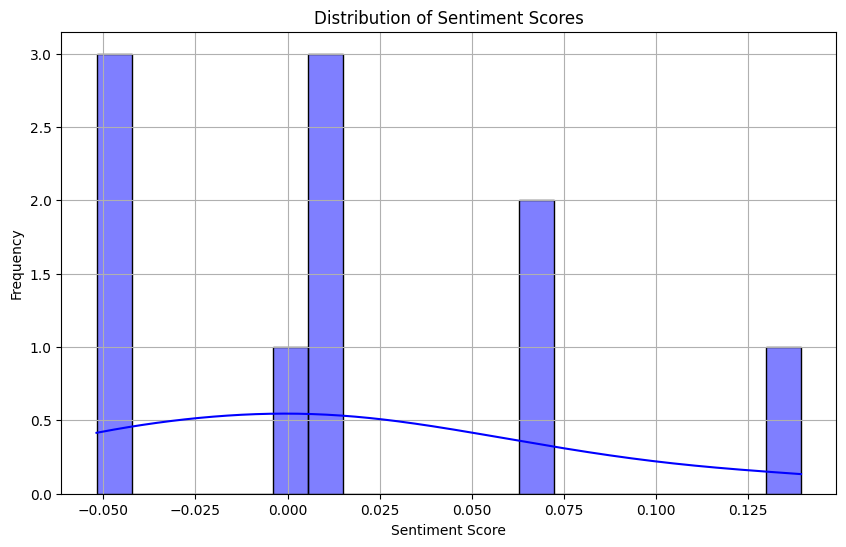

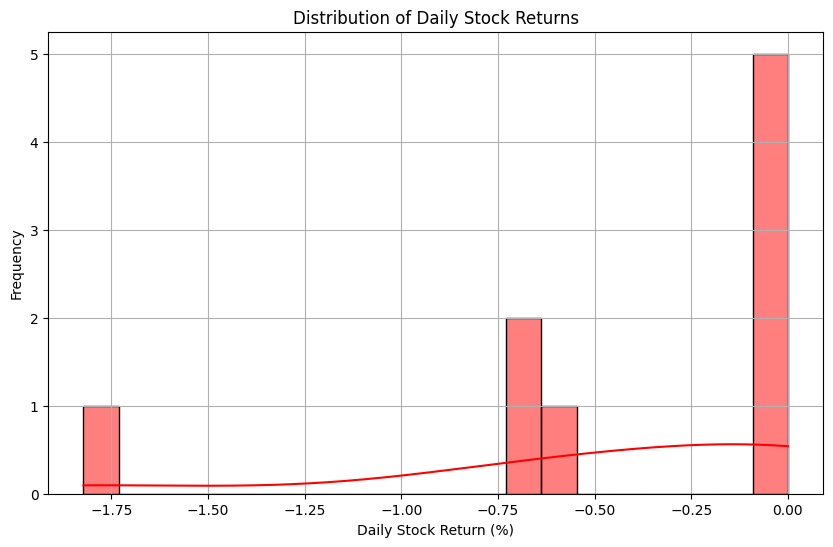

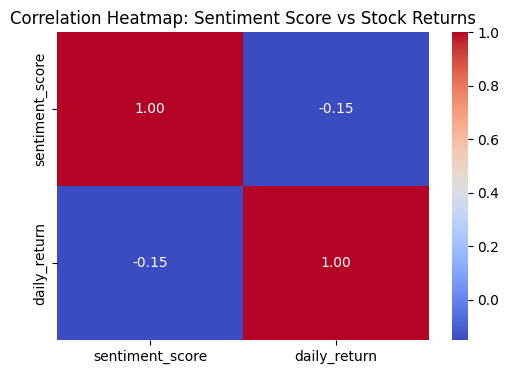

In [73]:
# Plot histogram of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(merged_analysisg['sentiment_score'], kde=True, color='blue', bins=20)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histogram of daily stock returns
plt.figure(figsize=(10, 6))
sns.histplot(merged_analysisg['daily_return'], kde=True, color='red', bins=20)
plt.title('Distribution of Daily Stock Returns')
plt.xlabel('Daily Stock Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Correlation heatmap
correlation_matrix = merged_analysisg[['sentiment_score', 'daily_return']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap: Sentiment Score vs Stock Returns')
plt.show()
